# Eliran Refaeli & Guy Dinar

# Kaggle Dataset
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

# Project Overview

## Goals
1. Try to answer 6 different EDA business questions
2. Clean the data
3. Try to use a variety of different packages (sns, plt) and visualizations (bars, lines, pies, boxplots)
4. Try to use different Pandas methods (info&describe, GroupBy, sort, merge (join), unions)
5. Make all "series-looking" outputs, dataframes!
6. Try to conclude interesting conclusions from the data
7. Don't be afraid to fail :)

## What we learned
1. Named Aggregations
2. Technical - "nlargest(n)", "reset_index()", "pivot()", different ways of normalizing data
4. Visual - "autopct" for adding labels to pie charts


## Issues

1. Couldn't find a way to efficiently add labels to bar charts in Pandas
2. Couldn't find a way to supress pandas output messages (Question 4)
3. Couldn't find a way to efficinetly add a trendline (regression?) to multiple bar charts (Question 5)
4. Couldn't find a way to stack area charts using Seaborn.


## Questions we couldn't answer

* Can we try to guess the original price of the car with 0 miles?

We wanted to follow a trend line back to "year zero", but couldn't failed in creating one.
* In general, how much money do I lose per mile I drive the car?

This is a derivative of the previous question.


# Import Libraries


In [156]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

# Create DataFrames

In [157]:
# get links from github
audi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/audi.csv'
bmw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/bmw.csv'
focus_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/focus.csv'
ford_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/ford.csv'
hyundi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/hyundi.csv'
merc_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/merc.csv'
skoda_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/skoda.csv'
toyota_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/toyota.csv'
vw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/vw.csv'

In [158]:
# import csv as dataframe
audi = pd.read_csv(audi_dataset)
bmw = pd.read_csv(bmw_dataset)
ford = pd.read_csv(ford_dataset)
hyundi = pd.read_csv(hyundi_dataset)
merc = pd.read_csv(merc_dataset)
skoda = pd.read_csv(skoda_dataset)
toyota = pd.read_csv(toyota_dataset)
vw = pd.read_csv(vw_dataset)

# add manufacturere column and 
audi['manufacturer'] = 'Audi'
bmw['manufacturer'] = 'BMW'
ford['manufacturer'] = 'Ford'
hyundi['manufacturer'] = 'Hyundi'
merc['manufacturer'] = 'Mercedes'
skoda['manufacturer'] = 'Skoda'
toyota['manufacturer'] = 'Toyota'
vw['manufacturer'] = 'VW'

hyundi.rename(columns = {'tax(£)': 'tax'}, inplace = True)

# append (union) all files
df_raw = audi.append([bmw, ford, hyundi, merc, skoda, toyota, vw])

df_raw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


# First impressions

In [159]:
df_raw.info()
print('*' * 100)
print(df_raw.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85555 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85555 non-null  object 
 1   year          85555 non-null  int64  
 2   price         85555 non-null  int64  
 3   transmission  85555 non-null  object 
 4   mileage       85555 non-null  int64  
 5   fuelType      85555 non-null  object 
 6   tax           85555 non-null  int64  
 7   mpg           85555 non-null  float64
 8   engineSize    85555 non-null  float64
 9   manufacturer  85555 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.2+ MB
****************************************************************************************************
               year          price        mileage           tax           mpg    engineSize
count  85555.000000   85555.000000   85555.000000  85555.000000  85555.000000  85555.000000
mean    2017.108305   17824.

# Cleaning the data

## General

In [160]:
### Filter time period 2000 - 2020 ###
# We noticed very few records from before 2000. We decided to take a round period of exactly 20 years.
df1 = df_raw[(df_raw['year'] >= 2000) & (df_raw['year'] <= 2020)]

In [161]:
### Clear Engine Size 0 ###
# We noticed records with engine size 0. We decided this is invalid data.
df2 = df1[df1['engineSize'] != 0]

## Checking outliers

In [162]:
### Clear very high mileage ###
# We noticed records with mileage 300,000.
df2[df2['mileage'] >= 300000]

# We concluded that is valid data.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
9822,A6,2008,2490,Manual,323000,Diesel,200,44.1,2.0,Audi
6069,Octavia,2010,1190,Manual,300000,Diesel,125,57.6,1.9,Skoda


In [163]:
### Clear very high MPG ###
# We noticed records with MPG 400 and above.
df2[(df2['mpg'] >= 400)]

# We concluded that the data is valid. Only 1 model gets > 400 MPG.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6,BMW
8188,i3,2015,14940,Automatic,59000,Other,0,470.8,0.6,BMW
8620,i3,2017,19300,Automatic,32867,Other,0,470.8,0.6,BMW
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0,BMW
10080,i3,2017,20000,Automatic,19178,Other,0,470.8,0.6,BMW
10086,i3,2017,19500,Automatic,23956,Other,135,470.8,0.6,BMW
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6,BMW
10530,i3,2017,17600,Automatic,50867,Other,135,470.8,0.6,BMW


In [164]:
### Engine Size Sanity Check ###
df2[(df2['fuelType'] == 'Other')]['engineSize'].value_counts().sort_index()

# We concluded that the new minimum of 0.6 makes sense.

0.6     7
1.0    81
1.2     8
1.3     2
1.4    11
1.5    27
1.6     2
1.8    27
2.0    73
2.5     1
3.0     6
Name: engineSize, dtype: int64

## Explore further...

In [165]:
### Removing new cars ###
# We decided that brand new cars might skew the data
df2[(df2['mileage'] <= 100) & (~df2['year'].isin([2019, 2020]))]

# We decided to remove the 64 records.
df3 = df2[~((df2['mileage'] <= 100) & (~df2['year'].isin([2019, 2020])))]

In [166]:
### adding Kilometer per Liter - KPL ###
# We decided KPL will make more sense to us. Formula found online.
df3['kpl'] = df3['mpg'] / 2.352

In [167]:
### Create final Dataframe ###
df = df3
len(df)

85231

# Exploratory Data Analysis

## General Questions
We started off with relatively easy questions to better understand the data.

###1 - which manufacturer is the most fuel efficient, on average?

In [168]:
df.groupby('manufacturer')['mpg'].agg('mean').reset_index().nlargest(1, columns='mpg')

,manufacturer,mpg
6,Toyota,63.049495


###2 - which model has been sold the earliest, on average?

In [169]:
df['age'] = 2021 - df['year']
df.groupby('model')['age'].agg('mean').reset_index().nlargest(5, columns='age')

,model,age
17,Accent,21.000000
164,Z3,19.500000
10,A2,18.000000
34,CLK,17.428571
138,Terracan,17.000000


###3 - what is the average price per Manufacturer, Model, Year?

In [170]:
df.groupby(['manufacturer' ,'model', 'year']).agg({'price': 'mean'}).reset_index().head(10)

,manufacturer,model,year,price
0,Audi,A1,2010,9990.000000
1,Audi,A1,2011,6302.000000
2,Audi,A1,2012,8090.761905
3,Audi,A1,2013,8745.982759
4,Audi,A1,2014,10060.084746
5,Audi,A1,2015,11245.778378
6,Audi,A1,2016,12233.848739
7,Audi,A1,2017,13445.322581
8,Audi,A1,2018,15469.126582
9,Audi,A1,2019,21208.438679


###4 - which fuel type has the highest average/median MPG/KPL

In [171]:
# We tried having fun writing everything in one row
df.groupby('fuelType').\
        agg(kpl_mean=('kpl', 'mean'), kpl_median=('kpl', 'median'), mpg_mean=('mpg', 'mean'), mpg_median=('mpg', 'median')).\
        sort_values(by = ['kpl_mean'], ascending = False)

,kpl_mean,kpl_median,mpg_mean,mpg_median
fuelType,,,,
Electric,85.799320,28.613946,201.800000,67.3
Other,36.482542,27.295918,85.806939,64.2
Hybrid,36.065988,32.482993,84.827204,76.4
Diesel,24.578028,25.042517,57.807522,58.9
Petrol,21.881003,22.236395,51.464118,52.3


## Question 1 - Who is the undisputed manufacturer king of used cars?
We decided to use a pie chart using pandas.

A pie chart easily shows a percentage from a total.

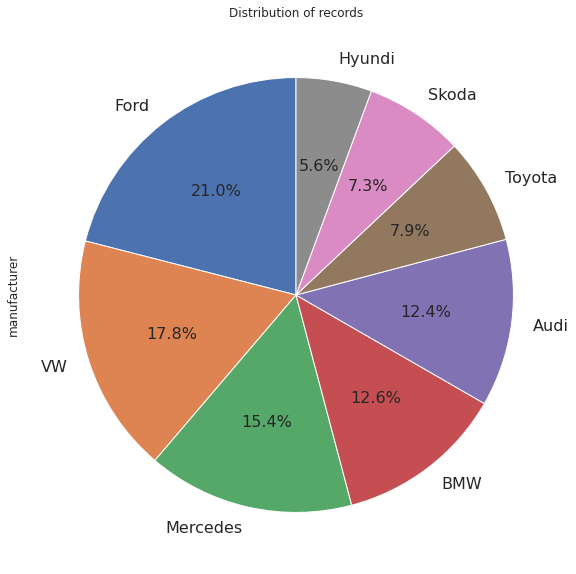

In [172]:
q1 = df['manufacturer'].value_counts()
q1.plot.pie(figsize=(14, 10), autopct='%1.1f%%', fontsize=16, startangle=90, title='Distribution of records')

## Question 2 - Which models were not paid tax on, for each manufacturer
We decided the best way to communicate this list of edge cases, would be a plain report (dataframe)

In [173]:
df[df['tax'] == 0].groupby(['manufacturer', 'model']).agg(Counter=('model', 'count'))

Counter
manufacturer model              
Audi          A1             327
              A3             132
              A4              75
              Q7               2
BMW           1 Series       163
              2 Series        24
              3 Series        96
              7 Series         1
              X5              17
              i3               6
              i8               7
Ford          B-MAX           39
              Fiesta        1530
              Focus          509
              Mondeo          68
Hyundi        I20              4
              I30            103
              Ioniq           27
Mercedes      A Class         53
              B Class          3
              C Class        114
              GLE Class        2
Skoda         Citigo          47
              Fabia           32
              Octavia        112
              Rapid           18
              Superb           8
Toyota        Auris          414
              Aygo           704
              C-HR            94
              IQ               4
              Prius          122
              Yaris          450
VW            Golf           435
              Golf SV         30
              Passat          18
              Polo            91
              Scirocco         1
              T-Roc            1
              Up              13

## Question 3 - Does MPG change through time? If so, which manufacturer improved the most?

We used this opportunity to create "group by" on different levels, and completely understand the syntax for merge.


In [ ]:
q3 = df.groupby(['manufacturer', 'year']).agg(mean_mpg=('mpg', 'mean'))
q3.reset_index(inplace=True)

min_year = q3.groupby('manufacturer').agg(first_year=('year', 'min'))
max_year = q3.groupby('manufacturer').agg(last_year=('year', 'max'))

# Same procedure, 2 dataframes:
q3_A1 = pd.merge(df, min_year, how='left', left_on=['manufacturer', 'year'] , right_on=['manufacturer', 'first_year'])
q3_A2 = q3_A1[q3_A1['year'] == q3_A1['first_year']]
q3_A3 = q3_A2.groupby('manufacturer').agg(first_year_mean=('mpg', 'mean'))

q3_B1 = pd.merge(df, max_year, how='left', left_on=['manufacturer', 'year'] , right_on=['manufacturer', 'last_year'])
q3_B2 = q3_B1[q3_B1['year'] == q3_B1['last_year']]
q3_B3 = q3_B2.groupby('manufacturer').agg(last_year_mean=('mpg', 'mean'))

# join together
joined_df = pd.merge(q3_A3, q3_B3, on='manufacturer')
joined_df['diff'] = joined_df['last_year_mean']-joined_df['first_year_mean']

joined_df.sort_values(by='diff').plot(kind='barh', figsize=(14, 10), y='diff', title='Diff in Average MPG')

## Question 4 - How does KPL change over time, for each transmission type?


In [ ]:
plt.figure(figsize=(14,10))

sns.set(font_scale=1) # Set font size
q4 = sns.lineplot(data=df, x='year', y='kpl', estimator=np.mean,
                  style='transmission', hue='transmission', marker='o', legend="brief", linewidth=3, ci=None)
q4.set_xticks(ticks=range(2000, 2021)) # fixes years like 2002.5
plt.show() 

## Question 5 - Which manufacturer changed the most in price through time, per age?
We decided to challenges ourselves and try to create a visual with multiple figures.

In [ ]:
df['age_from_2000'] = df['year'] - 2000

q5 = df.groupby(['manufacturer', 'model', 'age_from_2000']).agg(avg_price=('price', 'mean'))
q5.reset_index(inplace=True)

sns.set(font_scale=1.2) # Set font size
sns.catplot(x='age_from_2000', y='avg_price', col='manufacturer', data=q5, kind='bar', ci=None,  col_wrap=4)

## Question 6 - What is the share of transmission types, over time?
We wanted to do this one in Seaborn, but couldn't find a way to stack the area charts.

In [ ]:
q6 = df.groupby(['transmission', 'year']).agg(Counter=('transmission', 'count'))

q6_A = q6.groupby(['year']).apply(lambda x: 100 * x / float(x.sum())) # Use lambda to normalize values
q6_A.reset_index(inplace=True)

pivot = q6_A.pivot(index='year', columns='transmission', values='Counter')
pivot.plot(kind='area', stacked=True, figsize=(14,10), title='Distribution of records')

## Question 7 - what is the variety of engine sizes per transmission per manufacturer?
We tried answering this one using WOE, but we think we missed the point.


In [ ]:
df['woe'] = df['manufacturer']+'-'+df['transmission']+'-'+df['engineSize'].astype(str) # Create one big string instead of group by

q7 = df.groupby('woe').agg(counter=('manufacturer', 'count'))
records = sum(q7['counter'])
q7['normalized'] = (q7['counter'] / records)*100 # Use sum() to normalize values

q7.sort_values(by='normalized', ascending=False)

## Question 8 - What is the most contributing factor that affects the price?
We decided a correlation heatmap would be the best choice.

In [ ]:
plt.figure(figsize=(14,10))
q8 = df[['year', 'price', 'mileage', 'kpl', 'engineSize']]

sns.set(font_scale=1.5) # Set font size
sns.heatmap(data=q8.corr(), cmap='Blues', annot=True)